In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
THz_TO_CMM = 33.35641

def process_PHonon_fildyn(fname):
    freqs = {"imode":[],"THz":[],"CMM":[]}
    imode = 1
    with open(fname) as f:
        line = f.readline()
        while line != '':
            if 'freq' in line:
                freqs["imode"].append(imode)
                freqs["THz"].append(float(line[19:35]))
                freqs["CMM"].append(float(line[19:35])*THz_TO_CMM)
                imode += 1
            line = f.readline()
    return freqs

In [15]:
!ls

100Ry  50Ry  60Ry  80Ry  C.pz-mt.fhi.UPF  Untitled.ipynb


In [63]:
cutoffs = [50,60,80,100,120]
pdeps = [150,150,200,200,200]
myph = pd.DataFrame({})
qeph = pd.DataFrame({})

for cutoff, pdep in zip(cutoffs,pdeps):
    for iq in range(1,9):
        if iq == 1:
            fname = "./%dRy/c.asr.dyn1"%cutoff
        else:
            fname = "./%dRy/_ph0/c.dyn%d"%(cutoff,iq)
        arr = process_PHonon_fildyn(fname)
        df = pd.DataFrame(arr)
        df["cutoff"] = cutoff
        df["iq"] = iq
        if qeph.shape[0] == 0:
            qeph = df
        else:
            qeph = pd.concat([qeph,df])
            
        fname = "./%dRy/c.welph.save.pdep%d/dyn%d"%(cutoff,pdep,iq)
        arr = process_PHonon_fildyn(fname)
        df = pd.DataFrame(arr)
        df["cutoff"] = cutoff
        df["iq"] = iq
        if myph.shape[0] == 0:
            myph = df
        else:
            myph = pd.concat([myph,df])
        

In [64]:
mean_abs_error = []
max_abs_error = []
for cutoff in cutoffs:
    df1 = qeph[qeph["cutoff"]==cutoff]
    df2 = myph[myph["cutoff"]==cutoff]
    
    mean_abs_error.append(np.mean(np.abs(df1["CMM"]-df2["CMM"])))
    max_abs_error.append(np.max(np.abs(df1["CMM"]-df2["CMM"])))

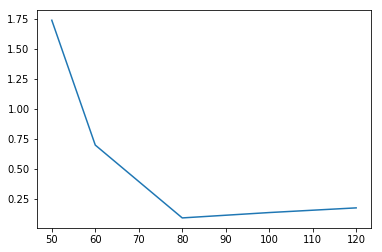

In [65]:
plt.plot(cutoffs,mean_abs_error)
# plt.plot(cutoffs,max_abs_error)
plt.show()

In [58]:
qeph[qeph["cutoff"]==50]-qeph[qeph["cutoff"]==100]

,CMM,THz,imode,cutoff,iq
0,0.000033,0.000001,0,-50,0
1,0.000000,0.000000,0,-50,0
2,-0.000033,-0.000001,0,-50,0
3,13.588000,0.407358,0,-50,0
4,13.588000,0.407358,0,-50,0
5,13.588000,0.407358,0,-50,0
0,1.867158,0.055976,0,-50,0
1,1.867158,0.055976,0,-50,0
2,8.438805,0.252989,0,-50,0
3,13.882571,0.416189,0,-50,0
